In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/noise_rating_modelling/decibel/data.csv")
df.head()

,INDEX,ZIP,START_TIME,LATITUDE,LONGITUDE,DISTANCE_TO_FREEWAY,Elevation,SOUND_SCORE,NEAREST_ROAD,AVG_DB
0,0,92101,11:55,32.706687,-117.158881,0.875466,2.595746,68,44.568579,67
1,1,92101,12:05,32.715174,-117.170637,0.808122,3.504305,66,36.028172,68
2,2,92101,12:12,32.721100,-117.165938,0.269374,16.989643,59,23.038479,70
3,3,92101,12:18,32.714169,-117.168266,0.875466,6.623694,68,51.097397,68
4,4,92101,12:22,32.714786,-117.169530,0.808122,3.533202,67,19.411378,62


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INDEX                299 non-null    int64  
 1   ZIP                  299 non-null    int64  
 2   START_TIME           299 non-null    object 
 3   LATITUDE             299 non-null    float64
 4   LONGITUDE            299 non-null    float64
 5   DISTANCE_TO_FREEWAY  299 non-null    float64
 6   Elevation            299 non-null    float64
 7   SOUND_SCORE          299 non-null    int64  
 8   NEAREST_ROAD         299 non-null    float64
 9   AVG_DB               299 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 23.5+ KB


In [4]:
# Convert 'START_TIME' to decimal hours
df['START_TIME'] = pd.to_datetime(df['START_TIME'], format='%H:%M').dt.hour + pd.to_datetime(df['START_TIME'], format='%H:%M').dt.minute / 60

In [5]:
df = df.drop(['INDEX','START_TIME','Elevation','SOUND_SCORE','NEAREST_ROAD'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZIP                  299 non-null    int64  
 1   LATITUDE             299 non-null    float64
 2   LONGITUDE            299 non-null    float64
 3   DISTANCE_TO_FREEWAY  299 non-null    float64
 4   AVG_DB               299 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 11.8 KB


In [6]:
# Split the data into features (X) and target variable (y)
X = df.drop('AVG_DB', axis=1)
y = df['AVG_DB']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Linear Regression - Mean Squared Error: 25.56, R-squared: 0.38
Decision Tree - Mean Squared Error: 47.89, R-squared: -0.16
Random Forest - Mean Squared Error: 26.60, R-squared: 0.35


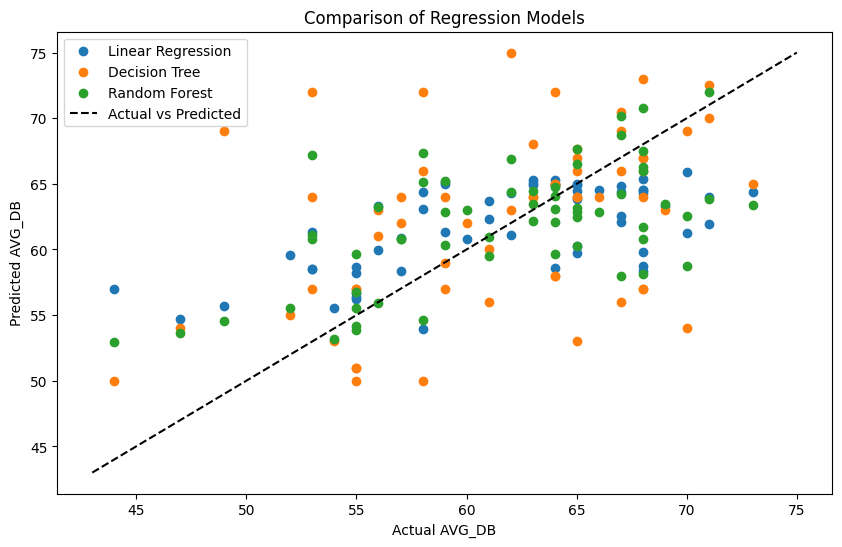

In [7]:
linear_reg_preds = linear_reg_model.predict(X_test)
decision_tree_preds = decision_tree_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)


models = [linear_reg_model, decision_tree_model, random_forest_model]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
for model, name in zip(models, model_names):
    mse = mean_squared_error(y_test, model.predict(X_test))
    r2 = r2_score(y_test, model.predict(X_test))
    print(f'{name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_reg_preds, label='Linear Regression')
plt.scatter(y_test, decision_tree_preds, label='Decision Tree')
plt.scatter(y_test, random_forest_preds, label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k', label='Actual vs Predicted')
plt.xlabel('Actual AVG_DB')
plt.ylabel('Predicted AVG_DB')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()

In [8]:
df_housing = pd.read_csv("/content/drive/MyDrive/noise_rating_modelling/riverside_city_housing_data.csv")
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   home_id                     343 non-null    int64  
 1   address                     343 non-null    object 
 2   city                        343 non-null    object 
 3   state_or_province           343 non-null    object 
 4   zip_or_postal_code          343 non-null    int64  
 5   price                       343 non-null    int64  
 6   beds                        343 non-null    int64  
 7   baths                       343 non-null    float64
 8   square_footage              342 non-null    float64
 9   lot_size                    343 non-null    int64  
 10  year_built                  343 non-null    int64  
 11  monthly_hoa                 142 non-null    float64
 12  latitude                    343 non-null    float64
 13  longitude                   343 non

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZIP                  299 non-null    int64  
 1   LATITUDE             299 non-null    float64
 2   LONGITUDE            299 non-null    float64
 3   DISTANCE_TO_FREEWAY  299 non-null    float64
 4   AVG_DB               299 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 11.8 KB


In [10]:
#creating a testing data set.
df_housing[['latitude','longitude']].head()

,latitude,longitude
0,33.865320,-117.457451
1,33.878485,-117.444925
2,33.889524,-117.472729
3,33.861895,-117.443365
4,33.880533,-117.470057


# Steps to final model testing
### - make scale of free way in kms ( update the freeway script )
### - create a testing data set
### - predict using RF model
### - plot the avd DB on map as per house location
### - format the end to end script
### - create a final presentation

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from scipy.spatial.distance import cdist
from math import radians, sin, cos, sqrt, atan2

image = cv2.imread('/content/drive/MyDrive/noise_rating_modelling/freeways_image.png')

def pixel_from_image(image):
  # Apply image processing to extract highways

  # For example, using Canny edge detection:
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray_image, 50, 150)

  # Find contours of the edges
  contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Draw contours on the original image
  cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

  # Display the image with contours
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  # Extract coordinates
  freeway_coordinates = []
  for contour in contours:
      for point in contour:
          x, y = point[0]
          freeway_coordinates.append((x, y))

  # Print the coordinates
  # for coord in freeway_coordinates:
  #     # print(f"Pixel Coordinate: {coord}")

  # # Display the original image and the red-highlighted image
  # # cv2.imshow('Original Image', image)
  # cv2_imshow(red_highlight)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()

  # # Display or save the coordinates
  # print(freeway_coordinates)
  return freeway_coordinates


def pixel_to_geographic(pixel_coords, geotransform):
    """
    Convert pixel coordinates to geographic coordinates using the provided geotransform.

    Parameters:
    - pixel_coords: List of pixel coordinates [(x1, y1), (x2, y2), ...]
    - geotransform: Geotransform information (tuple of 6 values)

    Returns:
    - List of geographic coordinates [(lon1, lat1), (lon2, lat2), ...]
    """
    lon_lat_coords = []

    for x, y in pixel_coords:
        lon = geotransform[0] + geotransform[1] * x + geotransform[2] * y
        lat = geotransform[3] + geotransform[4] * x + geotransform[5] * y
        lon_lat_coords.append((lat, lon))
    # print(lon_lat_coords)
    return lon_lat_coords

from scipy.spatial.distance import euclidean


def haversine(coord1, coord2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1, lon1 = radians(coord1[0]), radians(coord1[1])
    lat2, lon2 = radians(coord2[0]), radians(coord2[1])

    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Calculate distance
    distance = R * c

    return distance

def find_nearest_freeways(house_coordinates, geographic_coordinates):
    results = []

    for house_coord in house_coordinates:
        min_distance = float('inf')
        nearest_freeway = None

        for freeway_coords in geographic_coordinates:
            distance = haversine(house_coord, freeway_coords)

            if distance < min_distance:
                min_distance = distance
                nearest_freeway = freeway_coords

        results.append((house_coord, nearest_freeway, min_distance))

    return results


In [12]:

#combine two column la and long from hosuing dataframe and store a list of tuples.
# Function to combine latitude and longitude into a tuple
def combine_coordinates(row):
    return (row['latitude'], row['longitude'])

# Apply the function to create a new column 'coordinates'
df_housing['House_coordinates'] = df_housing.apply(combine_coordinates, axis=1)

# Display the DataFrame with the new 'coordinates' column
df_housing.head()

,home_id,address,city,state_or_province,zip_or_postal_code,price,beds,baths,square_footage,lot_size,...,dollars_per_square_feet,next_open_house_start_time,next_open_house_end_time,days_on_market,status,sale_type,sold_date,date_last_updated,date_created,House_coordinates
0,6219,17809 Montauk Cir,Riverside,CA,92503,644050,4,2.0,1635.0,7841,...,394.0,NaN,NaN,NaN,Sold,PAST SALE,2023-04-24,2023-12-05,2023-12-05,"(33.8653197, -117.4574512)"
1,6220,16571 Orangewind Ln,Riverside,CA,92503,975000,4,2.5,2348.0,32234,...,415.0,NaN,NaN,NaN,Sold,PAST SALE,2023-03-22,2023-12-05,2023-12-05,"(33.8784849, -117.4449248)"
2,6221,3096 Edwards Pl,Riverside,CA,92503,580000,4,2.0,1248.0,7405,...,465.0,NaN,NaN,NaN,Sold,PAST SALE,2023-05-12,2023-12-05,2023-12-05,"(33.8895237, -117.4727295)"
3,6222,12595 Orangeblossom Ln,Riverside,CA,92503,795000,5,3.0,3008.0,9583,...,264.0,NaN,NaN,NaN,Sold,PAST SALE,2023-06-20,2023-12-05,2023-12-05,"(33.8618953, -117.4433647)"
4,6223,17101 Knollbrook Pl,Riverside,CA,92503,740000,4,3.0,2627.0,7841,...,282.0,NaN,NaN,NaN,Sold,PAST SALE,2023-08-08,2023-12-05,2023-12-05,"(33.8805332, -117.4700573)"


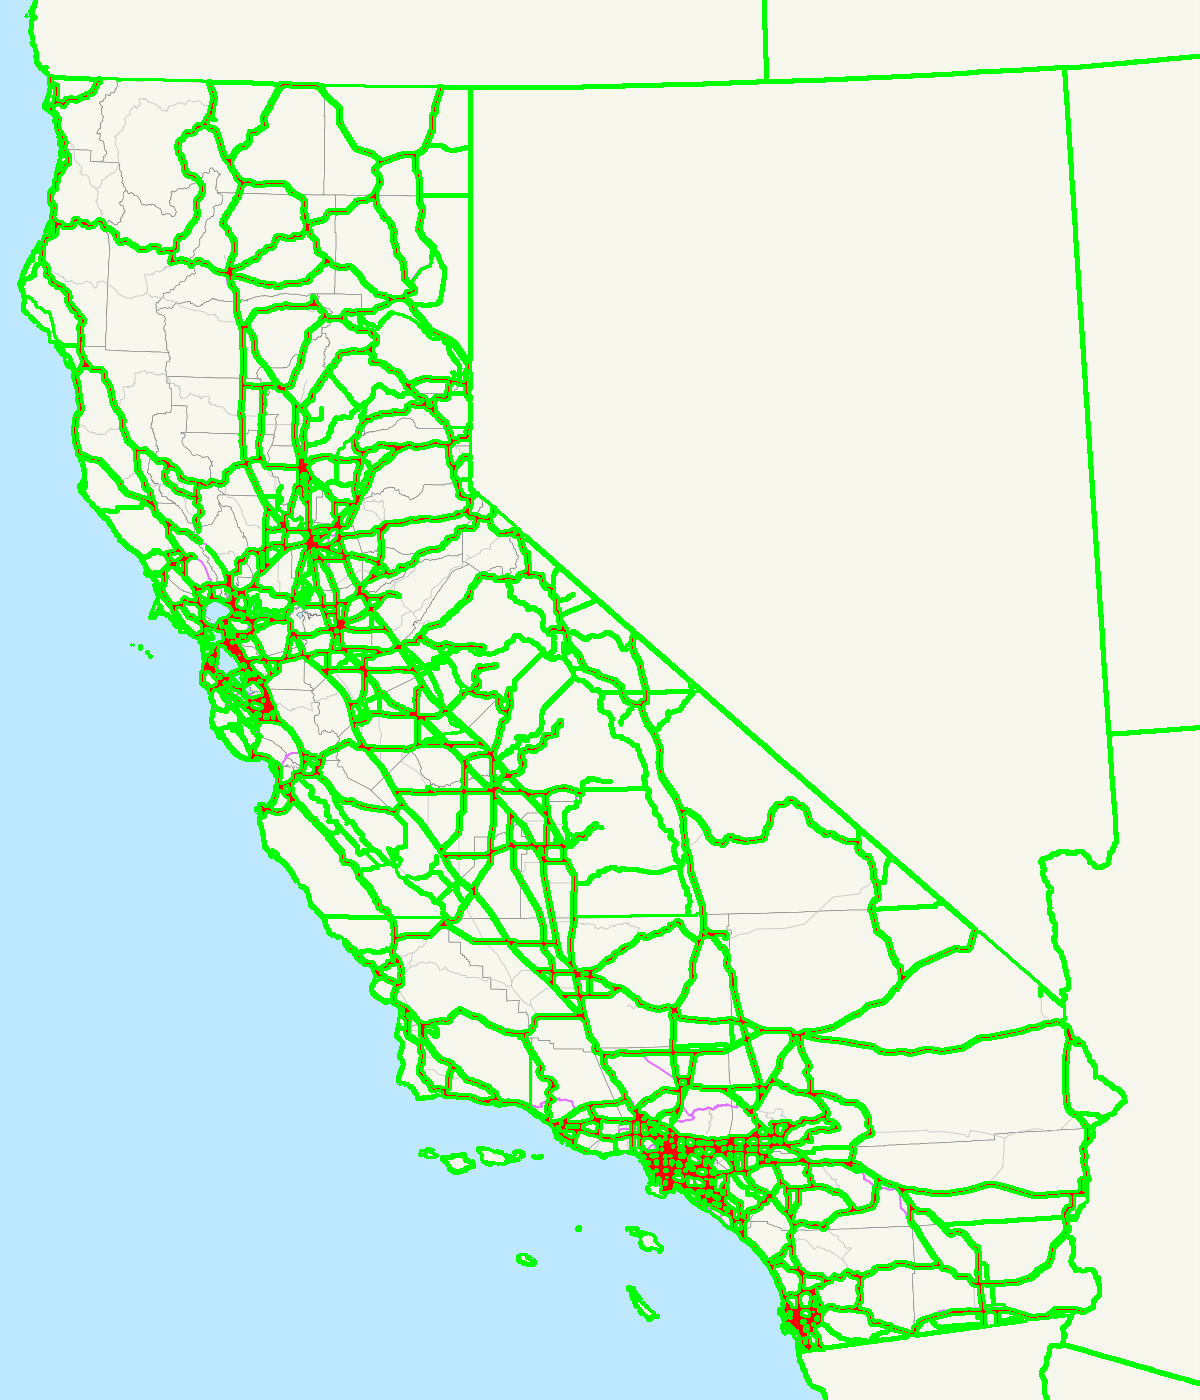

In [13]:
freeway_coordinates = pixel_from_image(image)

# Example usage for 1D vectors:
# house_coordinates_1d = (32.76913783812447, -117.05745519773639)

house_coordinates_1d = df_housing["House_coordinates"]


In [14]:
# Check if the image is successfully loaded
if image is not None:
  # Get image height, width, and number of channels
  height, width, channels = image.shape

  print(f"Image Width: {width} pixels")
  print(f"Image Height: {height} pixels")
  print(f"Number of Channels: {channels}")

else:
  print("Failed to load the image.")

max_lat = 42.002418
min_lat = 32.537805
max_long =-114.152041
min_long = -124.224141

lon_resolution = (max_long - min_long) / width
lat_resolution = (max_lat - min_lat) / height

# Replace with your actual geotransform obtained from the image
geotransform = (min_long, lon_resolution, 0, max_lat, 0, -lat_resolution)

#lets extract geo_corrdinates from freeway pixel
geographic_coordinates = pixel_to_geographic(freeway_coordinates, geotransform)

# for house_coord, nearest_freeway, min_distance in results:
#     print(f"For housing coordinates {house_coord}, the nearest freeway is {nearest_freeway} with a distance of {min_distance}")

# print(f"For housing coordinates {house_coord} ,the nearest freeway is {nearest_freeway} with a distance of {min_distance}")

Image Width: 1200 pixels
Image Height: 1400 pixels
Number of Channels: 3


In [15]:
#lets find nearest_freeway
results = find_nearest_freeways(house_coordinates_1d, geographic_coordinates)

# Extract the min_distance values from the results
min_distances = [result[2] for result in results]

# Add the 'min_distance' column to the existing DataFrame
df_housing['DISTANCE_TO_FREEWAY'] = min_distances

In [16]:
df_housing.head()

,home_id,address,city,state_or_province,zip_or_postal_code,price,beds,baths,square_footage,lot_size,...,next_open_house_start_time,next_open_house_end_time,days_on_market,status,sale_type,sold_date,date_last_updated,date_created,House_coordinates,DISTANCE_TO_FREEWAY
0,6219,17809 Montauk Cir,Riverside,CA,92503,644050,4,2.0,1635.0,7841,...,NaN,NaN,NaN,Sold,PAST SALE,2023-04-24,2023-12-05,2023-12-05,"(33.8653197, -117.4574512)",4.820732
1,6220,16571 Orangewind Ln,Riverside,CA,92503,975000,4,2.5,2348.0,32234,...,NaN,NaN,NaN,Sold,PAST SALE,2023-03-22,2023-12-05,2023-12-05,"(33.8784849, -117.4449248)",6.034355
2,6221,3096 Edwards Pl,Riverside,CA,92503,580000,4,2.0,1248.0,7405,...,NaN,NaN,NaN,Sold,PAST SALE,2023-05-12,2023-12-05,2023-12-05,"(33.8895237, -117.4727295)",4.045640
3,6222,12595 Orangeblossom Ln,Riverside,CA,92503,795000,5,3.0,3008.0,9583,...,NaN,NaN,NaN,Sold,PAST SALE,2023-06-20,2023-12-05,2023-12-05,"(33.8618953, -117.4433647)",6.157825
4,6223,17101 Knollbrook Pl,Riverside,CA,92503,740000,4,3.0,2627.0,7841,...,NaN,NaN,NaN,Sold,PAST SALE,2023-08-08,2023-12-05,2023-12-05,"(33.8805332, -117.4700573)",3.830455


In [17]:
#Data cleaning and preprocessing
df_housing.isnull().sum()

home_id                         0
address                         0
city                            0
state_or_province               0
zip_or_postal_code              0
price                           0
beds                            0
baths                           0
square_footage                  1
lot_size                        0
year_built                      0
monthly_hoa                   201
latitude                        0
longitude                       0
redfin_url                      0
property_type                   0
location                       10
dollars_per_square_feet         1
next_open_house_start_time    343
next_open_house_end_time      343
days_on_market                343
status                         10
sale_type                       0
sold_date                      10
date_last_updated               0
date_created                    0
House_coordinates               0
DISTANCE_TO_FREEWAY             0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZIP                  299 non-null    int64  
 1   LATITUDE             299 non-null    float64
 2   LONGITUDE            299 non-null    float64
 3   DISTANCE_TO_FREEWAY  299 non-null    float64
 4   AVG_DB               299 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 11.8 KB


In [19]:
#create sepearte latitude and longitude col from housing coordinates
df_housing[['LATITUDE', 'LONGITUDE']] = df_housing['House_coordinates'].apply(lambda x: pd.Series(x))
df_housing.rename(columns={'zip_or_postal_code': 'ZIP'}, inplace=True)

In [20]:
df_housing.head()

,home_id,address,city,state_or_province,ZIP,price,beds,baths,square_footage,lot_size,...,days_on_market,status,sale_type,sold_date,date_last_updated,date_created,House_coordinates,DISTANCE_TO_FREEWAY,LATITUDE,LONGITUDE
0,6219,17809 Montauk Cir,Riverside,CA,92503,644050,4,2.0,1635.0,7841,...,NaN,Sold,PAST SALE,2023-04-24,2023-12-05,2023-12-05,"(33.8653197, -117.4574512)",4.820732,33.865320,-117.457451
1,6220,16571 Orangewind Ln,Riverside,CA,92503,975000,4,2.5,2348.0,32234,...,NaN,Sold,PAST SALE,2023-03-22,2023-12-05,2023-12-05,"(33.8784849, -117.4449248)",6.034355,33.878485,-117.444925
2,6221,3096 Edwards Pl,Riverside,CA,92503,580000,4,2.0,1248.0,7405,...,NaN,Sold,PAST SALE,2023-05-12,2023-12-05,2023-12-05,"(33.8895237, -117.4727295)",4.045640,33.889524,-117.472729
3,6222,12595 Orangeblossom Ln,Riverside,CA,92503,795000,5,3.0,3008.0,9583,...,NaN,Sold,PAST SALE,2023-06-20,2023-12-05,2023-12-05,"(33.8618953, -117.4433647)",6.157825,33.861895,-117.443365
4,6223,17101 Knollbrook Pl,Riverside,CA,92503,740000,4,3.0,2627.0,7841,...,NaN,Sold,PAST SALE,2023-08-08,2023-12-05,2023-12-05,"(33.8805332, -117.4700573)",3.830455,33.880533,-117.470057


In [21]:
#droping unwanted columns

columns_to_keep = ['ZIP','LATITUDE','LONGITUDE','DISTANCE_TO_FREEWAY']

# Drop all columns except those specified in columns_to_keep
df_housing_subset = df_housing[columns_to_keep].copy()

# Display or use the modified DataFrame as needed
df_housing_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZIP                  343 non-null    int64  
 1   LATITUDE             343 non-null    float64
 2   LONGITUDE            343 non-null    float64
 3   DISTANCE_TO_FREEWAY  343 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 10.8 KB


In [22]:
# Make predictions using the trained Random Forest model
predictions = random_forest_model.predict(df_housing_subset)

# Add the predicted values to the DataFrame
df_housing_subset['Predicted_AVG_DB'] = predictions

In [23]:
df_housing_subset.head()


,ZIP,LATITUDE,LONGITUDE,DISTANCE_TO_FREEWAY,Predicted_AVG_DB
0,92503,33.865320,-117.457451,4.820732,56.8045
1,92503,33.878485,-117.444925,6.034355,56.8045
2,92503,33.889524,-117.472729,4.045640,56.8245
3,92503,33.861895,-117.443365,6.157825,56.8045
4,92503,33.880533,-117.470057,3.830455,56.7945


In [25]:
##ploting predictions on map with house location
df_housing_subset.to_csv("/content/drive/MyDrive/noise_rating_modelling/predicted_avg_db")

In [32]:
# Installing folium
!pip install folium

In [34]:
# Create a base map
import folium

map_center = [df_housing_subset['LATITUDE'].mean(), df_housing_subset['LONGITUDE'].mean()]
map = folium.Map(location=map_center, zoom_start=6)

# Function to choose color based on noise level
def color_producer(noise_level):
    if noise_level < 50:
        return 'green'
    elif 50 <= noise_level < 55:
        return 'black'
    elif 55 <= noise_level < 57:
       return  'orange'
    elif 57 <= noise_level < 60:
       return  'blue'
    else:
        return 'red'

# Add points to the map
for _, row in df_housing_subset.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=3,
        color=color_producer(row['Predicted_AVG_DB']),
        fill=True,
        fill_color=color_producer(row['Predicted_AVG_DB'])
    ).add_to(map)

# Save the map to an HTML file
map.save('/content/drive/MyDrive/noise_rating_modelling/california_noise_map.html')